In [2]:
!pip3 install requests pandas matplotlib



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
API_KEY = "1f5d32480c2352f044c6ef69430e1e44"
CITY_NAME = "London"
url = f"https://api.openweathermap.org/data/2.5/weather?q={CITY_NAME}&appid={API_KEY}&units=metric"
response = requests.get(url)
data = response.json()

print(data)

if "main" in data:
    city = data["name"]
    temp = data["main"]["temp"]
    humidity = data["main"]["humidity"]
    weather = data["weather"][0]["description"]
    
    print(f"City: {city}\nTemperature: {temp}°C\nHumidity: {humidity}%\nWeather: {weather}")
else:
    print("Error fetching weather data.")

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.35, 'feels_like': 2.07, 'temp_min': 3.9, 'temp_max': 5.07, 'pressure': 1018, 'humidity': 88, 'sea_level': 1018, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 2.57, 'deg': 340}, 'clouds': {'all': 100}, 'dt': 1739286641, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1739258516, 'sunset': 1739293663}, 'timezone': 0, 'id': 2643743, 'name': 'London', 'cod': 200}
City: London
Temperature: 4.35°C
Humidity: 88%
Weather: overcast clouds


In [13]:
data_dict = {
    "City": [city],
    "Temperature (°C)": [temp],
    "Humidity (%)": [humidity],
    "Weather Description": [weather]
}

weather_df = pd.DataFrame(data_dict)
print(weather_df)

     City  Temperature (°C)  Humidity (%) Weather Description
0  London              4.35            88     overcast clouds


In [14]:
weather_df.to_csv("weather_data.csv", index=False)
print("Data saved to weather_data.csv")

Data saved to weather_data.csv


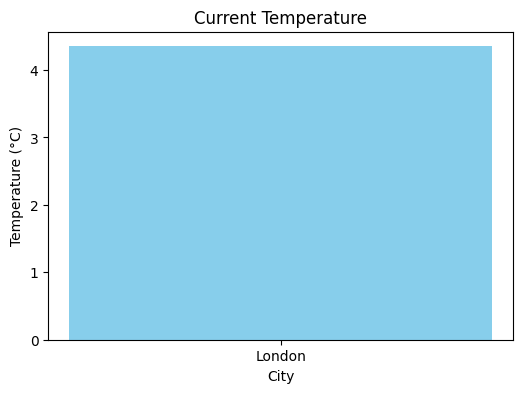

In [15]:
plt.figure(figsize=(6,4))
plt.bar(weather_df["City"], weather_df["Temperature (°C)"], color='skyblue')
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Current Temperature")
plt.show()


In [18]:
cities = ["London", "Florida", "China", "Egypt", "Norway"]
weather_data = []

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url)
    data = response.json()
    
    if "main" in data:
        weather_data.append({
            "City": city,
            "Temperature (°C)": data["main"]["temp"],
            "Humidity (%)": data["main"]["humidity"],
            "Weather Description": data["weather"][0]["description"]
        })

multi_city_df = pd.DataFrame(weather_data)
print(multi_city_df)

      City  Temperature (°C)  Humidity (%) Weather Description
0   London              4.27            88     overcast clouds
1  Florida             22.30            88     overcast clouds
2    China             21.51            83     overcast clouds
3    Egypt             -2.01            70     overcast clouds
4   Norway            -14.76            67           clear sky


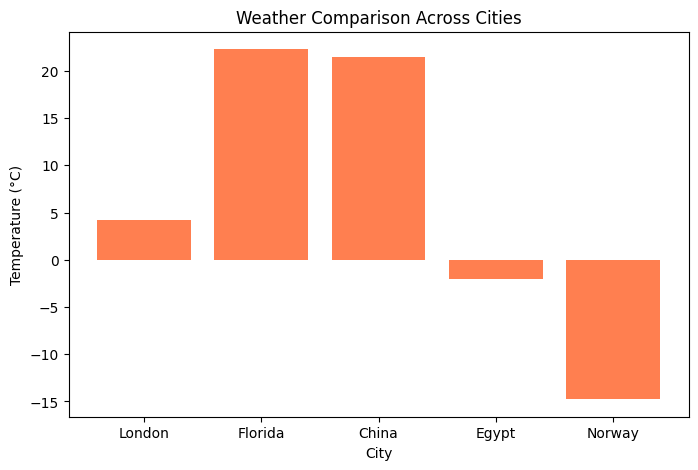

In [19]:
plt.figure(figsize=(8,5))
plt.bar(multi_city_df["City"], multi_city_df["Temperature (°C)"], color='coral')
plt.xlabel("City")
plt.ylabel("Temperature (°C)")
plt.title("Weather Comparison Across Cities")
plt.show()